### <font color = Azure> Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp

### <font color = Azure> Importing Data

In [2]:
data = pd.read_csv('dados.csv')
data.head(6)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906


### <font color = Azure> Knowing the Data

##### National Sample Survey of Households 2015
The National Sample Survey of Households (PNAD) investigates annually, on a permanent basis, general characteristics of the population, education, labor, income and housing and others, with variable periodicity, according to the information needs for the country, such as characteristics on migration, fertility, nuptiality, health, food security, among other topics. The collection of these statistics constitutes, throughout the 49 years of the survey, an important instrument for the formulation, validation, and evaluation of policies aimed at socioeconomic development and the improvement of living conditions in Brazil.

#### <font color = Antiquewhite>Variables used

> Renda (Income)

Monthly income from main job for people 10 years old and older.

> Idade (Age)

Age of the resident on the date the data was obtained

> Altura (Height)

Resident's height in meters

> UF (State Code)

11 -> Rondônia  |
12 -> Acre  |
13 -> Amazonas  |
14 -> Roraima  |
15 -> Pará  |
16 -> Amapá  |
17 -> Tocantins  |
21 -> Maranhão  |
22 -> Piauí  |
23 -> Ceará  |
24 -> Rio Grande do Norte  |
25 -> Paraíba  |
26 -> Pernambuco  |
27 -> Alagoas  |
28 -> Sergipe  |
29 -> Bahia  |
31 -> Minas Gerais  |
32 -> Espírito Santo  |
33 -> Rio de Janeiro  |
35 -> São Paulo  |
41 -> Paraná  |
42 -> Santa Catarina  |
43 -> Rio Grande do Sul  |
50 -> Mato Grosso do Sul  |
51 -> Mato Grosso  |
52 -> Goiás  |
53 -> Distrito Federal

> Sexo (Sex)

0 -> Male  | 1 -> Female

> Anos de Estudo (Years of study)

1 -> No education or less than one year   |
2 -> 1 years  |
3 -> 2 years  |
...  |
15 -> 14 years  |
16 -> 15 years or more  |
17 -> Undetermined  |

> Cor (Color)

0 -> indigenous  | 2 -> white  | 4 -> black  | 6 -> yellow  | 8 -> brown  | 9 -> undeclared

##### Note: For the income variable, invalid and missing records were eliminated and only the people responsible for their households were considered


#### <font color = Antiquewhite> Data Types

In [3]:
# Ordinal qualitative variables - that can be sorted or ranked
sorted(data['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [4]:
# Nominal qualitative variables - that can`t be sorted or ranked
print(sorted(data['UF'].unique()))
print(sorted(data['Sexo'].unique()))
print(sorted(data['Cor'].unique()))

[11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 35, 41, 42, 43, 50, 51, 52, 53]
[0, 1]
[0, 2, 4, 6, 8]


In [5]:
# Discrete quantitative variables - represent a count where the possible values form a finite or enumerable set
print('Minimum age ', data.Idade.min())
print('Maximum age ', data.Idade.max())

Minimum age  13
Maximum age  99


In [6]:
# Continuous quantitative variables - represents a count or measurement that takes on values on a continuous scale (real numbers)
print('Minimum height ', data.Altura.min())
print('Maximum height ', data.Altura.max())

Minimum height  1.339244614
Maximum height  2.028496765


### <font color = Azure> Frequency Distribution

#### <font color = Antiquewhite> Qualitative Variables

In [7]:
frequency = data['Sexo'].value_counts()
frequency

0    53250
1    23590
Name: Sexo, dtype: int64

In [8]:
percentage = data['Sexo'].value_counts(normalize=True) * 100
percentage

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [9]:
dist_freq_qualitatives = pd.DataFrame({'Frequency': frequency, 'Percentage (%)': percentage})
dist_freq_qualitatives

,Frequency,Percentage (%)
0,53250,69.299844
1,23590,30.700156


In [10]:
dist_freq_qualitatives.rename(index = {0: 'Male', 1: 'Female'}, inplace = True)
#dist_freq_qualitatives.rename_axis('Sex', axis = 'columns', inplace = True)
dist_freq_qualitatives

,Frequency,Percentage (%)
Male,53250,69.299844
Female,23590,30.700156


In [11]:
sex = {0:'Male', 1:'Female'}
color = {0 : 'Indigenous', 2 : 'White', 4 : 'Black', 6 : 'Yellow', 8 : 'Brown', 9 : 'Undeclared'}

In [12]:
alt_frequency = pd.crosstab(data.Sexo, data.Cor)
alt_frequency.rename(index = sex, inplace = True)
alt_frequency.rename(columns = color, inplace = True)
alt_frequency

Cor,Indigenous,White,Black,Yellow,Brown
Sexo,,,,,
Male,256,22194,5502,235,25063
Female,101,9621,2889,117,10862


In [13]:
alt_percentage = pd.crosstab(data.Sexo, data.Cor, normalize=True)*100
alt_percentage.rename(index = sex, inplace = True)
alt_percentage.rename(columns = color, inplace = True)
alt_percentage

Cor,Indigenous,White,Black,Yellow,Brown
Sexo,,,,,
Male,0.333160,28.883394,7.160333,0.305830,32.617126
Female,0.131442,12.520822,3.759761,0.152264,14.135867


In [14]:
frequency_income = pd.crosstab(data.Sexo, data.Cor, aggfunc='mean', values = data.Renda)
frequency_income.rename(index = sex, inplace = True)
frequency_income.rename(columns = color, inplace = True)
frequency_income

Cor,Indigenous,White,Black,Yellow,Brown
Sexo,,,,,
Male,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Female,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


#### <font color = Antiquewhite> Quantitative Variables

In [15]:
# class specifications
# 2015 minimum wage = 788
# A -> Over 20 minimum wages | Over 15760
# B -> Between 10 and 20 minimum wages | Between 7880 and 15760
# C -> Between 4 and 10 minimum wages | Between 3152 and 7880
# D -> Between 2 and 4 minimum wages | Between 1576 and 3152
# E -> Less than 2 minimum wages | Less than 1576

In [16]:
print('Min ', data.Renda.min())
print('Max ', data.Renda.max())

Min  0
Max  200000


In [17]:
wage_class = [0,1576,3152,7880,15760,data.Renda.max()]
labels = ['E', 'D', 'C', 'B', 'A']

In [18]:
pd.cut(x = data.Renda, bins = wage_class, labels = labels, include_lowest = True).head()

0    E
1    E
2    E
3    C
4    E
Name: Renda, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [19]:
wage_frequency = pd.value_counts(pd.cut(x = data.Renda, bins = wage_class, labels = labels, include_lowest = True))
wage_frequency

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [20]:
wage_percentage = pd.value_counts(pd.cut(x = data.Renda, bins = wage_class, labels = labels, include_lowest = True), normalize=True) * 100
wage_percentage

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

In [21]:
wage_dist_freq_quantitatives = pd.DataFrame({'Frequency': wage_frequency, 'Percentage (%)': wage_percentage})
wage_dist_freq_quantitatives.sort_index(ascending=False)

,Frequency,Percentage (%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


In [22]:
# Define the number of classes with fixed amplitude classes
# Rule of Sturges
# k = 1 + (10/3) * (log10(n))
n = data.shape[0]
k = 1 + (10/3) * (np.log10(n))
k = int(k)
k

17

In [23]:
alt_wage_frequency = pd.value_counts(pd.cut(x = data.Renda, bins = k, include_lowest = True), sort=False)
alt_wage_frequency

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

In [24]:
alt_wage_percentage = pd.value_counts(pd.cut(x = data.Renda, bins = k, include_lowest = True), sort=False, normalize=True) * 100
alt_wage_percentage

(-200.001, 11764.706]       98.378449
(11764.706, 23529.412]       1.330036
(23529.412, 35294.118]       0.219938
(35294.118, 47058.824]       0.024727
(47058.824, 58823.529]       0.020822
(58823.529, 70588.235]       0.006507
(70588.235, 82352.941]       0.005206
(82352.941, 94117.647]       0.001301
(94117.647, 105882.353]      0.007808
(105882.353, 117647.059]     0.000000
(117647.059, 129411.765]     0.001301
(129411.765, 141176.471]     0.000000
(141176.471, 152941.176]     0.000000
(152941.176, 164705.882]     0.000000
(164705.882, 176470.588]     0.000000
(176470.588, 188235.294]     0.000000
(188235.294, 200000.0]       0.003904
Name: Renda, dtype: float64

In [25]:
alt_wage_dist_freq_quantitatives = pd.DataFrame({'Frequency': alt_wage_frequency, 'Percentage (%)': alt_wage_percentage})
alt_wage_dist_freq_quantitatives

,Frequency,Percentage (%)
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808
"(105882.353, 117647.059]",0,0.000000


C:\Users\renat\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequency distribution - Height'}, xlabel='Height (m)'>

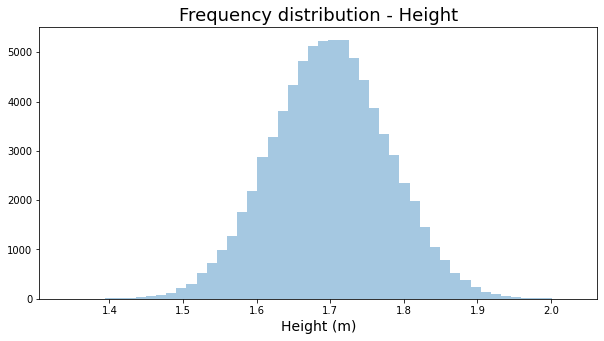

In [26]:
#Graphs
ax = sns.distplot(data.Altura,kde = False)
ax.figure.set_size_inches(10,5)
ax.set_title('Frequency distribution - Height', fontsize = 18)
ax.set_xlabel('Height (m)', fontsize = 14)
ax

<AxesSubplot:title={'center':'Frequency distribution - Height - KDE'}, xlabel='Height (m)', ylabel='Density'>

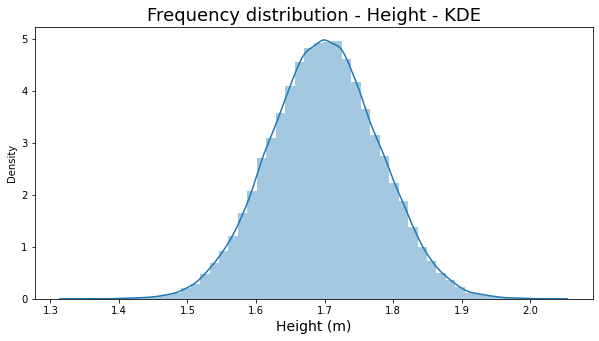

In [27]:
#Graphs
ax = sns.distplot(data.Altura)
ax.figure.set_size_inches(10,5)
ax.set_title('Frequency distribution - Height - KDE', fontsize = 18)
ax.set_xlabel('Height (m)', fontsize = 14)
ax

<AxesSubplot:>

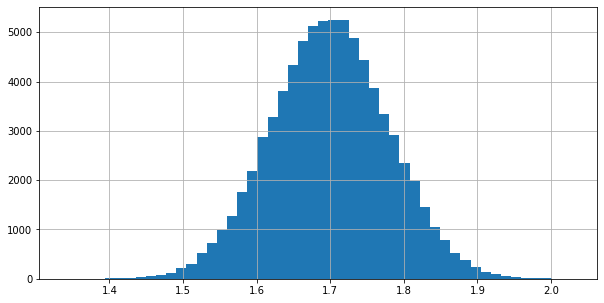

In [28]:
data.Altura.hist(bins = 50, figsize=(10,5))

<AxesSubplot:>

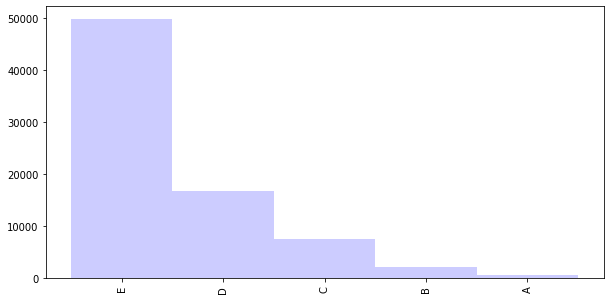

In [29]:
wage_dist_freq_quantitatives['Frequency'].plot(kind = 'bar', figsize=(10,5), width = 1, color = 'blue', alpha = 0.2)

### <font color = Azure> General Tendency Measures

In [30]:
#Example DataFrame
df = pd.DataFrame(data = {'Fulano' : [8,10,4,8,6,10,8], 'Beltrano' : [10,2,0.5,1,3,9.5,10], 'Sicrano' : [7.5,8,7,8,8,8.5,7]}, index = ['Math', 'Portuguese', 'English', 'Geography', 'History', 'Physics', 'Chemistry'])
df.rename_axis('Topic', axis = 'columns', inplace = True)
df

Topic,Fulano,Beltrano,Sicrano
Math,8,10.0,7.5
Portuguese,10,2.0,8.0
English,4,0.5,7.0
Geography,8,1.0,8.0
History,6,3.0,8.0
Physics,10,9.5,8.5
Chemistry,8,10.0,7.0


In [31]:
#Mean
print((8+10+4+8+6+10+8)/7)
df['Fulano'].mean() 

7.714285714285714


7.714285714285714

In [32]:
data.Renda.mean()

2000.3831988547631

In [34]:
data.groupby('Sexo')['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

In [43]:
#Median
ord = df.Fulano.sort_values()
ord = ord.reset_index()
ord

,index,Fulano
0,English,4
1,History,6
2,Math,8
3,Geography,8
4,Chemistry,8
5,Portuguese,10
6,Physics,10


In [44]:
n = ord.shape[0]
n

7

In [49]:
meadian = 0
if n%2 == 1:
    median = (n+1)/2
else:
    median = n/2
print(median)
ord.loc[median-1]

4.0


index     Geography
Fulano            8
Name: 3, dtype: object

In [52]:
ord.Fulano.median()

8.0

In [53]:
data.Renda.median()

1200.0

In [54]:
data.Renda.quantile(0.5)

1200.0

In [55]:
#Mode
df.mode()

Topic,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [56]:
data.Renda.mode()

0    788
Name: Renda, dtype: int64

In [57]:
data.Altura.mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

In [58]:
data.Cor.mode()

0    8
Name: Cor, dtype: int64

C:\Users\renat\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Renda', ylabel='Density'>

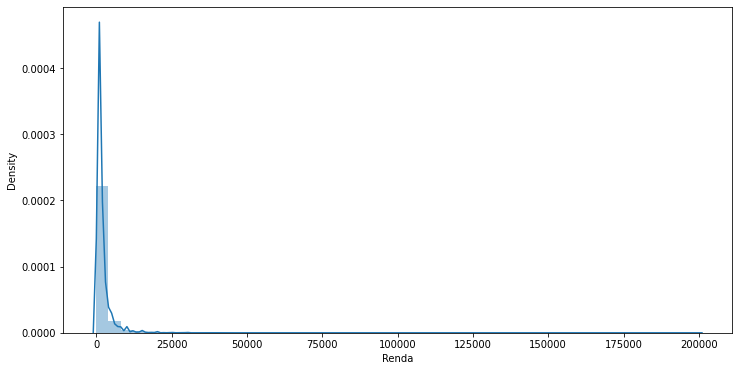

In [64]:
#Graphs
ax = sns.distplot(data.Renda)
ax.figure.set_size_inches(12,6)
ax

C:\Users\renat\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Renda', ylabel='Density'>

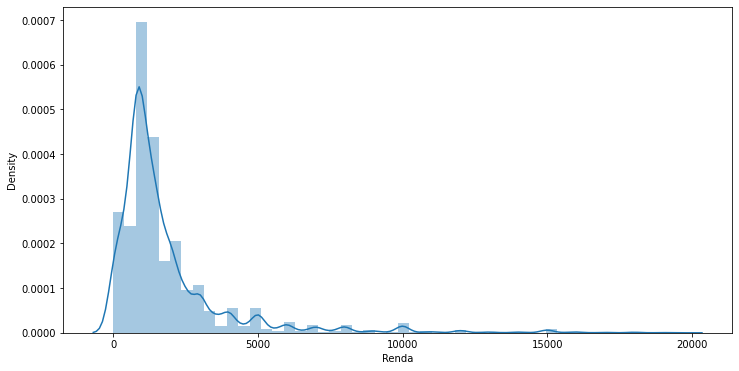

In [63]:
ax = sns.distplot(data.query('Renda < 20000').Renda)
ax.figure.set_size_inches(12,6)
ax

In [75]:
data.Renda.mode()

0    788
Name: Renda, dtype: int64

In [66]:
data.Renda.median()

1200.0

In [67]:
data.Renda.mean()

2000.3831988547631

In [68]:
#Right asymmetry
data.Renda.mode()[0] < data.Renda.median() < data.Renda.mean()

True

C:\Users\renat\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Altura', ylabel='Density'>

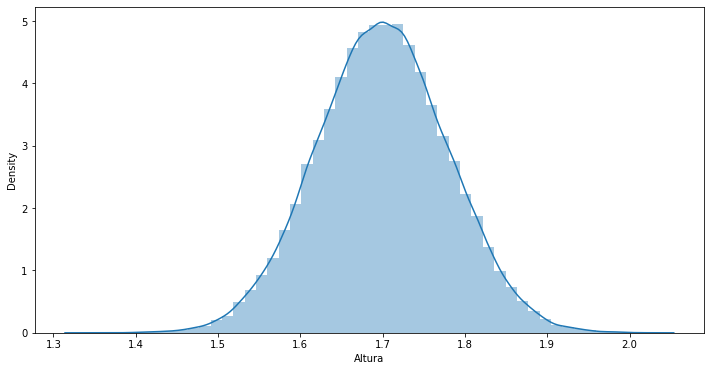

In [69]:
# Symmetry
ax = sns.distplot(data.Altura)
ax.figure.set_size_inches(12,6)
ax

In [73]:
data.Altura.mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

In [71]:
data.Altura.median()

1.6993247325

In [72]:
data.Altura.mean()

1.6995124540575741

C:\Users\renat\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Anos de Estudo', ylabel='Density'>

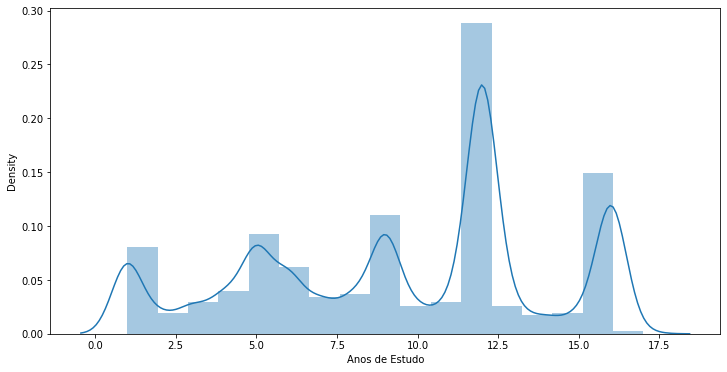

In [78]:
ax = sns.distplot(data['Anos de Estudo'], bins = 17)
ax.figure.set_size_inches(12,6)
ax

In [79]:
data['Anos de Estudo'].mode()

0    12
Name: Anos de Estudo, dtype: int64

In [80]:
data['Anos de Estudo'].median()

11.0

In [81]:
data['Anos de Estudo'].mean()

9.469664237376367

In [82]:
#Left asymmetry
data['Anos de Estudo'].mode()[0] > data['Anos de Estudo'].median() > data['Anos de Estudo'].mean()

True

### <font color = Azure> Separating Measures

In [84]:
# Quartiles, Deciles, Percentiles
data.Renda.quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [88]:
data.Renda.quantile([i/10 for i in range(1,10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

C:\Users\renat\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequency Cumulative Distribution'}, xlabel='Years', ylabel='Accumulated'>

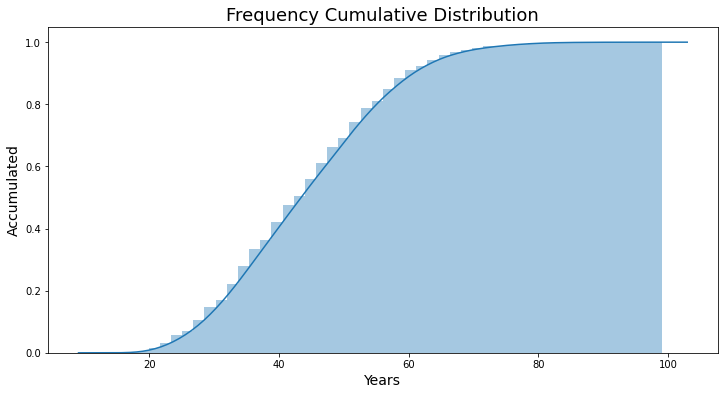

In [93]:
ax = sns.distplot(data.Idade, hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True})
ax.figure.set_size_inches(12,6)
ax.set_title('Frequency Cumulative Distribution', fontsize = 18)
ax.set_xlabel('Years', fontsize = 14)
ax.set_ylabel('Accumulated', fontsize = 14)
ax

C:\Users\renat\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequency Cumulative Distribution'}, xlabel='Years', ylabel='Accumulated'>

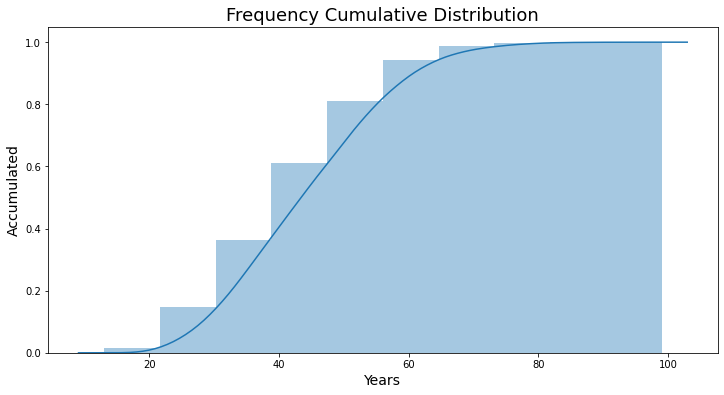

In [94]:
ax = sns.distplot(data.Idade, hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True}, bins = 10)
ax.figure.set_size_inches(12,6)
ax.set_title('Frequency Cumulative Distribution', fontsize = 18)
ax.set_xlabel('Years', fontsize = 14)
ax.set_ylabel('Accumulated', fontsize = 14)
ax

In [91]:
data.Idade.quantile([i/10 for i in range(1,10)])

0.1    28.0
0.2    33.0
0.3    36.0
0.4    40.0
0.5    43.0
0.6    47.0
0.7    51.0
0.8    55.0
0.9    61.0
Name: Idade, dtype: float64

<AxesSubplot:title={'center':'Heigth'}, xlabel='Meters'>

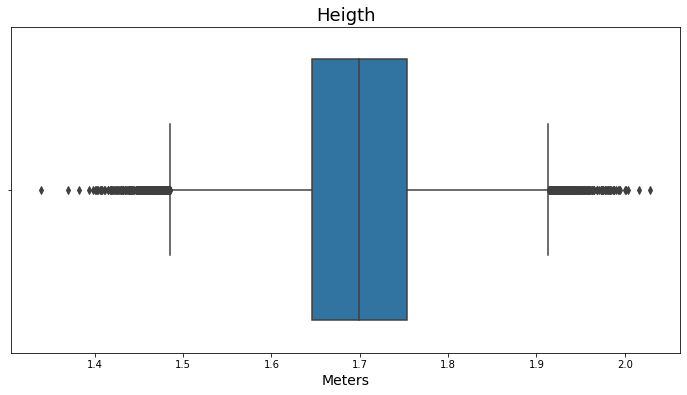

In [104]:
# Boxplot
ax = sns.boxplot(x = 'Altura', data = data, orient = 'h')
ax.figure.set_size_inches(12,6)
ax.set_title('Heigth', fontsize = 18)
ax.set_xlabel('Meters', fontsize = 14)
ax

<AxesSubplot:title={'center':'Heigth'}, xlabel='Meters', ylabel='Sexo'>

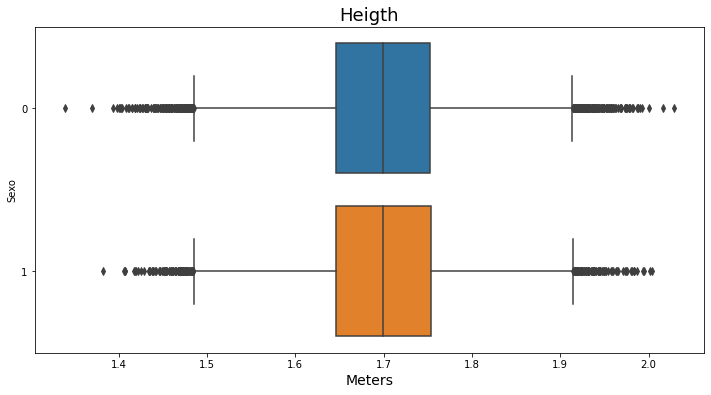

In [105]:
ax = sns.boxplot(x = 'Altura', y = 'Sexo', data = data, orient = 'h')
ax.figure.set_size_inches(12,6)
ax.set_title('Heigth', fontsize = 18)
ax.set_xlabel('Meters', fontsize = 14)
ax

<AxesSubplot:title={'center':'Income'}, xlabel='R$', ylabel='Sexo'>

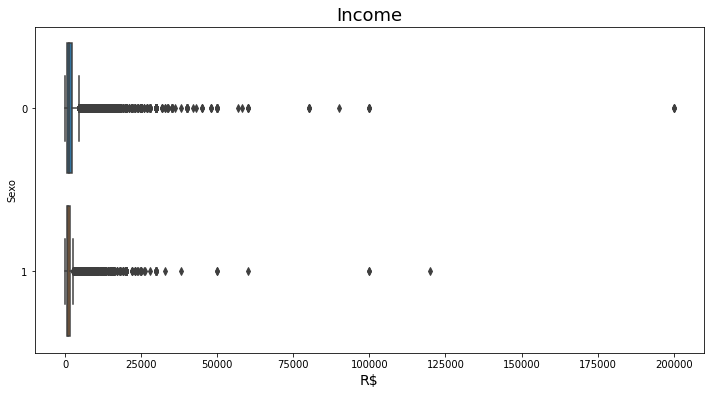

In [106]:
ax = sns.boxplot(x = 'Renda', y = 'Sexo', data = data, orient = 'h')
ax.figure.set_size_inches(12,6)
ax.set_title('Income', fontsize = 18)
ax.set_xlabel('R$', fontsize = 14)
ax

<AxesSubplot:title={'center':'Income'}, xlabel='R$', ylabel='Sexo'>

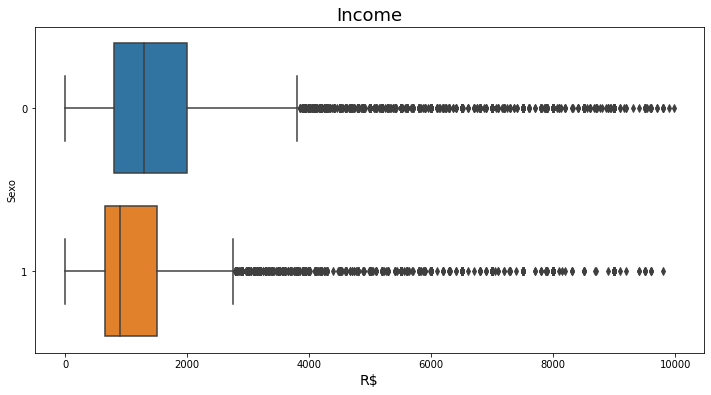

In [107]:
ax = sns.boxplot(x = 'Renda', y = 'Sexo', data = data.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12,6)
ax.set_title('Income', fontsize = 18)
ax.set_xlabel('R$', fontsize = 14)
ax

<AxesSubplot:title={'center':'Income'}, xlabel='R$'>

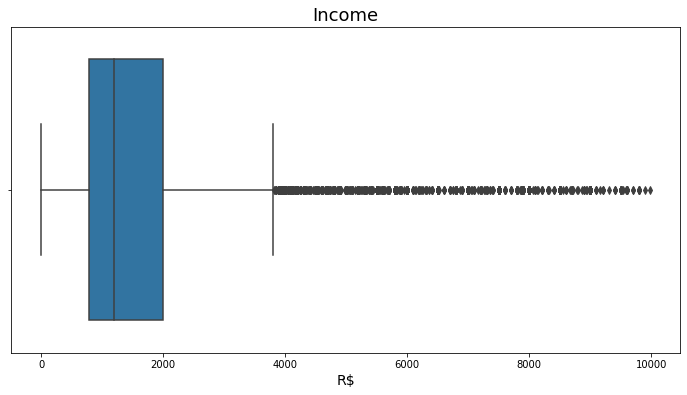

In [108]:
ax = sns.boxplot(x = 'Renda', data = data.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12,6)
ax.set_title('Income', fontsize = 18)
ax.set_xlabel('R$', fontsize = 14)
ax

<AxesSubplot:title={'center':'Years of study'}, xlabel='Years'>

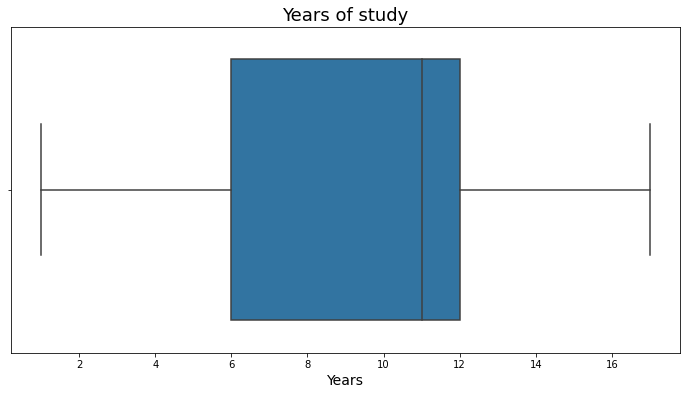

In [109]:
ax = sns.boxplot(x = 'Anos de Estudo', data = data, orient = 'h')
ax.figure.set_size_inches(12,6)
ax.set_title('Years of study', fontsize = 18)
ax.set_xlabel('Years', fontsize = 14)
ax

<AxesSubplot:title={'center':'Years of study'}, xlabel='Years', ylabel='Sexo'>

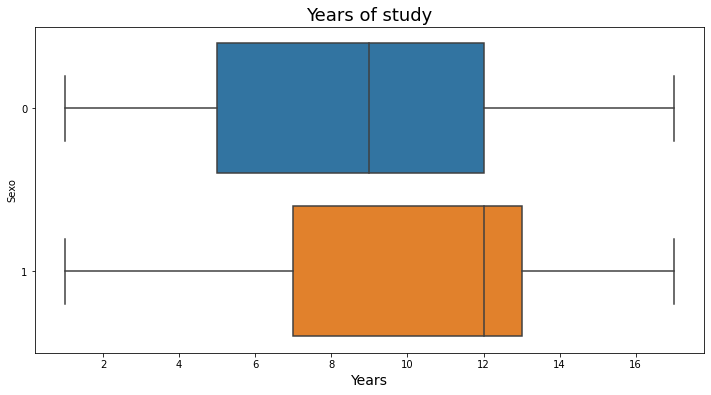

In [110]:
ax = sns.boxplot(x = 'Anos de Estudo', y = 'Sexo', data = data, orient = 'h')
ax.figure.set_size_inches(12,6)
ax.set_title('Years of study', fontsize = 18)
ax.set_xlabel('Years', fontsize = 14)
ax

### <font color = Azure> Dispersion Measures

In [112]:
df

Topic,Fulano,Beltrano,Sicrano
Math,8,10.0,7.5
Portuguese,10,2.0,8.0
English,4,0.5,7.0
Geography,8,1.0,8.0
History,6,3.0,8.0
Physics,10,9.5,8.5
Chemistry,8,10.0,7.0


In [127]:
notes_fulano = df[['Fulano']]
notes_fulano

Topic,Fulano
Math,8
Portuguese,10
English,4
Geography,8
History,6
Physics,10
Chemistry,8


In [128]:
mean_notes = notes_fulano.mean()[0]
mean_notes

7.714285714285714

In [129]:
notes_fulano['Desvio'] = notes_fulano['Fulano'] - mean_notes
notes_fulano

C:\Users\renat\AppData\Local\Temp\ipykernel_2524\1789626921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notes_fulano['Desvio'] = notes_fulano['Fulano'] - mean_notes


Topic,Fulano,Desvio
Math,8,0.285714
Portuguese,10,2.285714
English,4,-3.714286
Geography,8,0.285714
History,6,-1.714286
Physics,10,2.285714
Chemistry,8,0.285714


In [131]:
notes_fulano['| Desvio |'] = notes_fulano['Desvio'].abs()
notes_fulano

Topic,Fulano,Desvio,| Desvio |
Math,8,0.285714,0.285714
Portuguese,10,2.285714,2.285714
English,4,-3.714286,3.714286
Geography,8,0.285714,0.285714
History,6,-1.714286,1.714286
Physics,10,2.285714,2.285714
Chemistry,8,0.285714,0.285714


<AxesSubplot:>

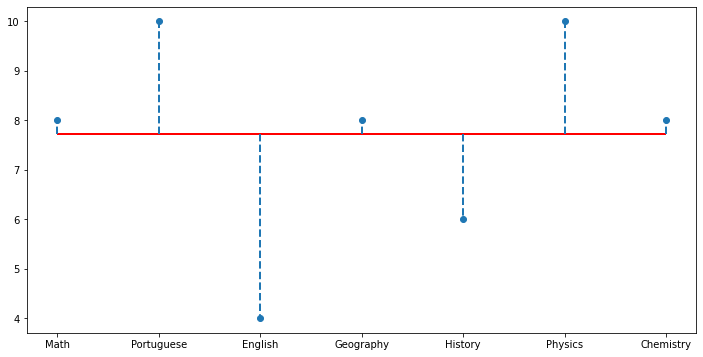

In [133]:
ax = notes_fulano['Fulano'].plot(style = 'o')
ax.figure.set_size_inches(12,6)
ax.hlines(y = mean_notes, xmin = 0, xmax = notes_fulano.shape[0] -1, color = 'red', linewidth = 2)
for i in range(notes_fulano.shape[0]):
    ax.vlines(x = i, ymin = mean_notes, ymax= notes_fulano['Fulano'][i] , linestyles='dashed', linewidth = 2)
ax

In [134]:
#Absolute mean deviation
# DM = sum(|x - x̄|) / n
notes_fulano['| Desvio |'].mean()

1.5510204081632648

In [138]:
abs_mean_deviation = notes_fulano['Fulano'].mad()
abs_mean_deviation

1.5510204081632648

In [143]:
# Variance
# Population -> V = sum(x - x̄)^2 / n
# Sample -> V = sum(x - x̄)^2 / (n - 1)
notes_fulano['(Desvio)^2'] = notes_fulano['Desvio'].pow(2)
notes_fulano

Topic,Fulano,Desvio,| Desvio |,(Desvio)^2
Math,8,0.285714,0.285714,0.081633
Portuguese,10,2.285714,2.285714,5.224490
English,4,-3.714286,3.714286,13.795918
Geography,8,0.285714,0.285714,0.081633
History,6,-1.714286,1.714286,2.938776
Physics,10,2.285714,2.285714,5.224490
Chemistry,8,0.285714,0.285714,0.081633


In [144]:
notes_fulano['(Desvio)^2'].sum()/(len(notes_fulano)-1)

4.57142857142857

In [146]:
variance = notes_fulano['Fulano'].var()
variance

4.57142857142857

In [148]:
# Standard Deviation
# Population -> S = sqrt(sum(x - x̄)^2 / n)
# Sample -> S = sqrt(sum(x - x̄)^2 / (n - 1))
np.sqrt(variance)

2.1380899352993947

In [149]:
standard_deviation = notes_fulano['Fulano'].std()
standard_deviation

2.1380899352993947

In [150]:
df

Topic,Fulano,Beltrano,Sicrano
Math,8,10.0,7.5
Portuguese,10,2.0,8.0
English,4,0.5,7.0
Geography,8,1.0,8.0
History,6,3.0,8.0
Physics,10,9.5,8.5
Chemistry,8,10.0,7.0


In [151]:
df.mean()

Topic
Fulano      7.714286
Beltrano    5.142857
Sicrano     7.714286
dtype: float64

In [152]:
df.median()

Topic
Fulano      8.0
Beltrano    3.0
Sicrano     8.0
dtype: float64

In [153]:
df.mode()

Topic,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [154]:
df.std()

Topic
Fulano      2.138090
Beltrano    4.460141
Sicrano     0.566947
dtype: float64